<a href="https://colab.research.google.com/github/gameaphiwat/DWDM21/blob/main/Chap8Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-means**

##**Generate Data**

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

##**Explore Data**

In [4]:
X.shape

(500, 2)

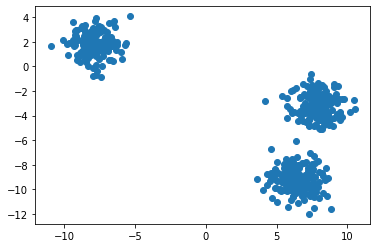

In [8]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0] , X[:,1])

##**Clustering**

###Import

In [9]:
from sklearn.cluster import KMeans

###Define

In [10]:
kmeans = KMeans(n_clusters=2, random_state=6)

### Train-Predict

In [13]:
 y_clust = kmeans.fit_predict(X)

In [14]:
 y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

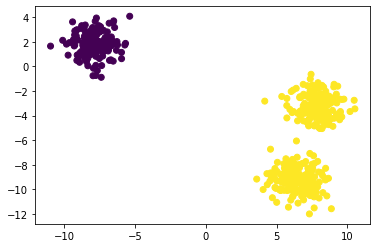

In [15]:
plt.scatter(X[:,0], X[:,1], c=y_clust)

###**3 clusters**

In [31]:
#Define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit_predict
 y_clust=kmeans.fit_predict(X)
#plot
 plt.scatter(X[:,0], X[:,1], c=y_clust)

IndentationError: ignored

###**4 clusters**

In [32]:
import cv2
import os

In [35]:
img = cv2.imread('/content/photo83.jpg')

In [36]:
img.shape

(550, 550, 3)

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGB)